# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [ ]:
data = pd.read_csv('Obesity_dataset.csv')

In [ ]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Select one random sample from each category
Insuffficient_weight = data[data['NObeyesdad'] == 'Insufficient_Weight'].sample(1,random_state=14)
Normal_weight = data[data['NObeyesdad'] == 'Normal_Weight'].sample(1,random_state=14)
Overweight_level_I = data[data['NObeyesdad'] == 'Overweight_Level_I'].sample(1,random_state=14)
Overweight_level_II = data[data['NObeyesdad'] == 'Overweight_Level_II'].sample(1,random_state=14)
Obesity_type_I = data[data['NObeyesdad'] == 'Obesity_Type_I'].sample(1,random_state=14)
Obesity_type_II = data[data['NObeyesdad'] == 'Obesity_Type_II'].sample(1,random_state=14)
Obesity_type_III = data[data['NObeyesdad'] == 'Obesity_Type_III'].sample(1,random_state=14)

demo = pd.concat([Insuffficient_weight, Normal_weight, Overweight_level_I, Overweight_level_II,Obesity_type_I,Obesity_type_II,Obesity_type_III])

# Remove the selected samples from the dataset
data = data.drop(demo.index)

# Print the new dataset size
print(f"New dataset size: {len(data)}")

New dataset size: 20751


In [ ]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# Data Visualization

In [ ]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4045
Obesity_Type_II        3247
Normal_Weight          3081
Obesity_Type_I         2909
Insufficient_Weight    2522
Overweight_Level_II    2521
Overweight_Level_I     2426
Name: count, dtype: int64

Balancing dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(random_state=24)
x = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

x_resampled,y_resampled = RUS.fit_resample(x,y)

data = pd.concat([x_resampled, y_resampled], axis=1, join='inner')


In [ ]:
data['NObeyesdad'].value_counts()

NObeyesdad
Insufficient_Weight    2426
Normal_Weight          2426
Obesity_Type_I         2426
Obesity_Type_II        2426
Obesity_Type_III       2426
Overweight_Level_I     2426
Overweight_Level_II    2426
Name: count, dtype: int64

Encode every non numeric value into numeric value

In [ ]:
encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = encoder.fit_transform(data['FAVC'])
data['SMOKE'] = encoder.fit_transform(data['SMOKE'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['SCC'] = encoder.fit_transform(data['SCC'])

In [ ]:
CAEC_cols = ['no','Sometimes','Frequently','Always']

#Label
Obese_level = ['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II',	'Obesity_Type_III']

Oncoder = OrdinalEncoder(categories=[CAEC_cols])

data['CAEC'] = Oncoder.fit_transform(data['CAEC'].to_frame())

In [ ]:
print(Obese_level)

['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']


In [ ]:
data['CALC'] = Oncoder.fit_transform(data['CALC'].to_frame())

In [ ]:
LOncoder = OrdinalEncoder(categories=[Obese_level])

data['NObeyesdad'] = LOncoder.fit_transform(data['NObeyesdad'].to_frame())

In [ ]:
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
5715,5715,0,19.058511,1.673491,49.650897,0,0,3.000000,3.697831,2.0,0,1.000000,0,0.144950,0.000000,1.0,3,0.0
12671,12671,0,22.000000,1.700000,50.000000,0,1,3.000000,3.000000,2.0,0,2.000000,0,2.000000,1.000000,1.0,3,0.0
13433,13433,0,17.099015,1.556579,44.050251,0,1,2.000000,3.000000,1.0,0,1.198883,0,1.000000,0.000000,1.0,3,0.0
9433,9433,1,18.000000,1.781543,50.869704,0,1,1.140615,3.000000,1.0,0,1.639524,0,0.520408,1.000000,1.0,3,0.0
2140,2140,1,18.000000,1.691206,51.592225,1,1,2.000000,3.000000,1.0,0,1.000000,0,0.520407,1.560402,0.0,3,0.0


In [ ]:
data.shape

(16982, 18)

In [ ]:
data.dtypes

id                                  int64
Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                              float64
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                              float64
MTRANS                              int32
NObeyesdad                        float64
dtype: object

<Axes: xlabel='Age', ylabel='Count'>

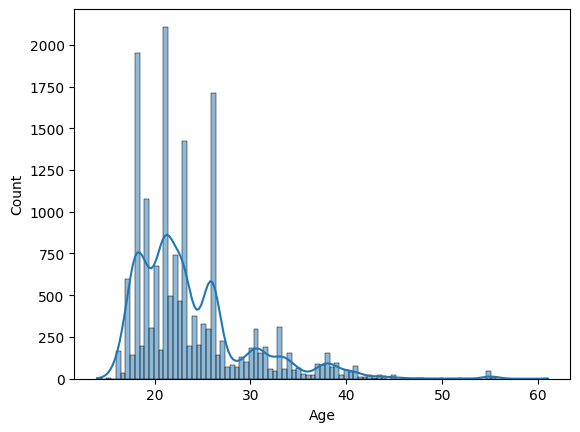

In [ ]:
sns.histplot(data=data['Age'],kde=True)

<Axes: xlabel='Weight', ylabel='Count'>

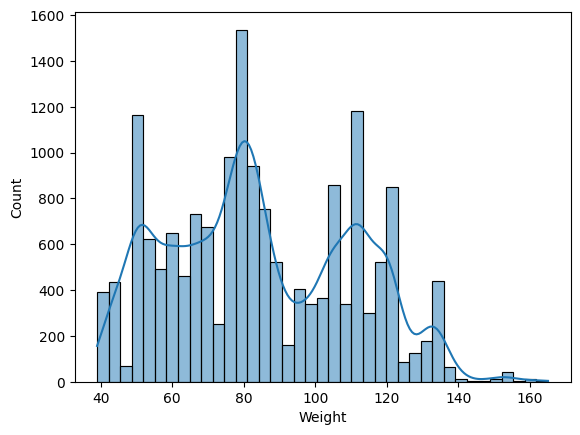

In [ ]:
sns.histplot(data=data['Weight'],kde=True)

<Axes: xlabel='Height', ylabel='Count'>

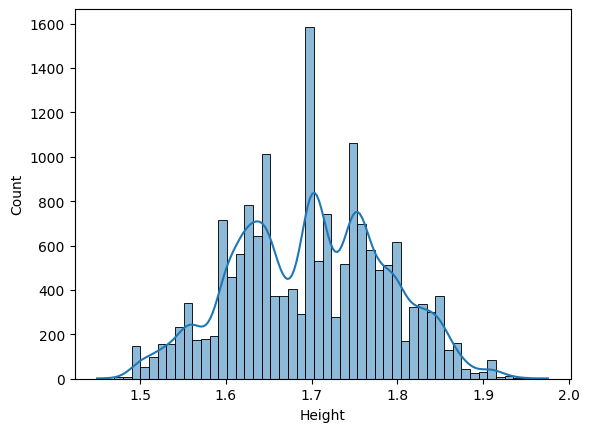

In [ ]:
sns.histplot(data=data['Height'],kde=True)

<Axes: xlabel='Height', ylabel='Weight'>

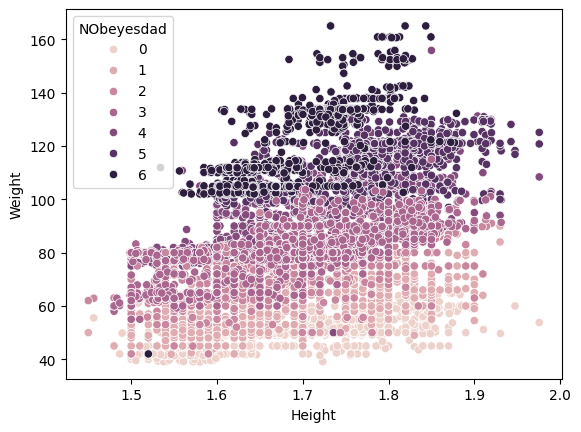

In [ ]:
sns.scatterplot(data=data,x='Height',y='Weight',hue='NObeyesdad')

<Axes: xlabel='FCVC', ylabel='NCP'>

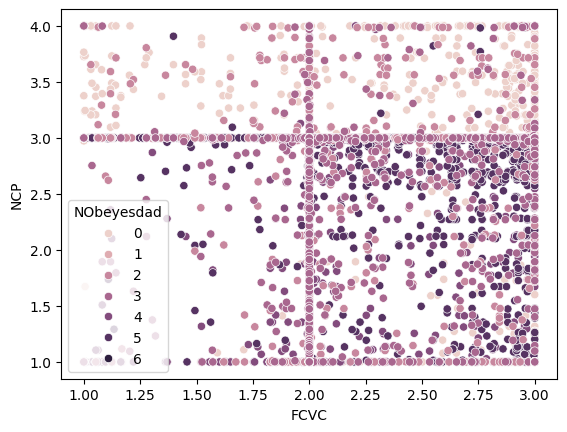

In [ ]:
sns.scatterplot(data=data,x='FCVC',y='NCP',hue='NObeyesdad')

<Axes: ylabel='Age'>

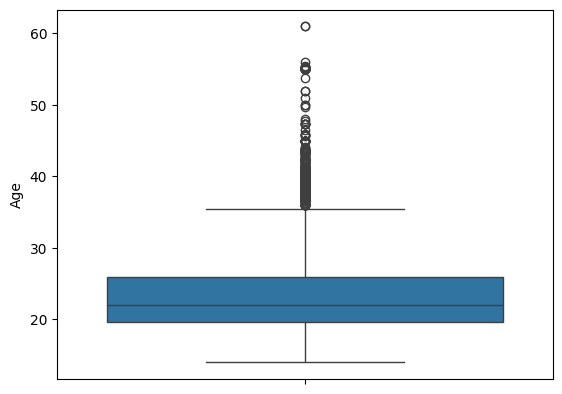

In [ ]:
sns.boxplot(data=data['Age'])

<Axes: ylabel='Height'>

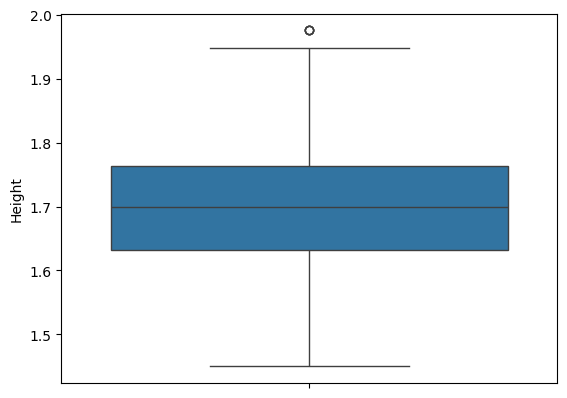

In [ ]:
sns.boxplot(data=data['Height'])

<Axes: ylabel='Weight'>

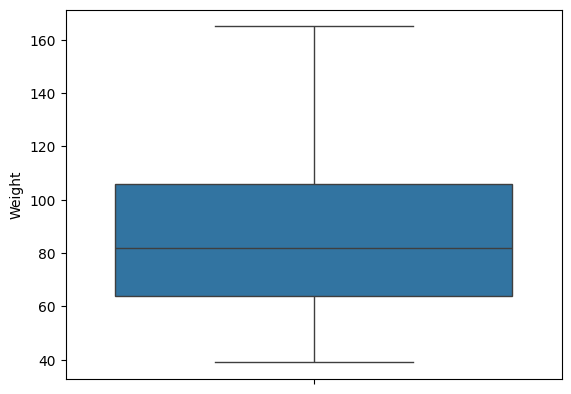

In [ ]:
sns.boxplot(data=data['Weight'])

<Axes: >

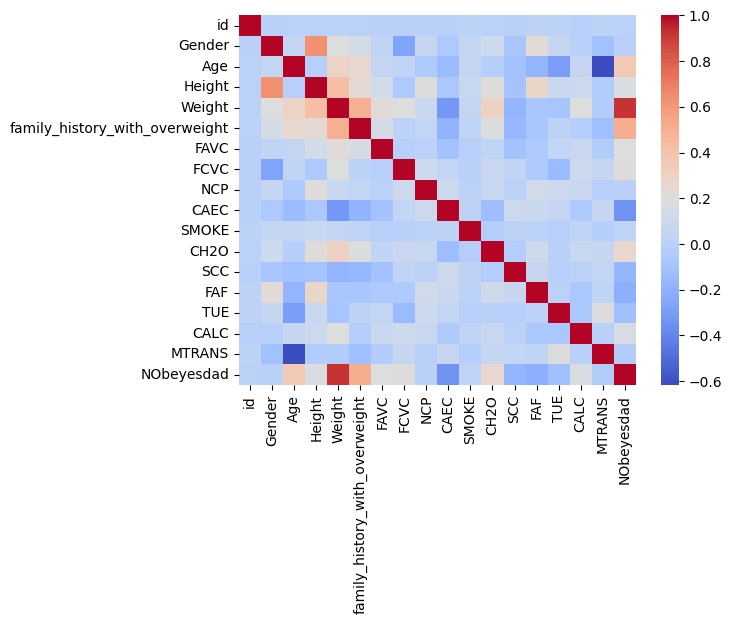

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm')

# Preprocessing

Check Missing Value

In [ ]:
data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Check for duplicate value

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

Feature Selection

In [ ]:
copydata = data.copy()
copydata = copydata.drop(columns=['NObeyesdad'])
features = list(copydata.columns)

selected_features = []
for feature in features:
    correlation_coefficient,p_value = pearsonr(copydata[feature],data['NObeyesdad'])
    if abs(correlation_coefficient) > 0.1 and p_value < 0.05:
        print(correlation_coefficient,p_value,feature)
        selected_features.append(feature)



In [ ]:
selected_features

['Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC']

In [ ]:
columns = selected_features
columns.append('NObeyesdad')

In [ ]:
data = data[columns]

In [ ]:
data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
5715,19.058511,1.673491,49.650897,0,0,3.000000,2.0,1.000000,0,0.144950,0.000000,1.0,0.0
12671,22.000000,1.700000,50.000000,0,1,3.000000,2.0,2.000000,0,2.000000,1.000000,1.0,0.0
13433,17.099015,1.556579,44.050251,0,1,2.000000,1.0,1.198883,0,1.000000,0.000000,1.0,0.0
9433,18.000000,1.781543,50.869704,0,1,1.140615,1.0,1.639524,0,0.520408,1.000000,1.0,0.0
2140,18.000000,1.691206,51.592225,1,1,2.000000,1.0,1.000000,0,0.520407,1.560402,0.0,0.0


Removing Outlier from AGE

In [ ]:
data.shape

(16982, 13)

In [ ]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['Age']<=Lower)[0]
data.drop(index=Lower_array,inplace=True)
data = data.reset_index(drop=True)

Upper_array = np.where(data['Age']>=Upper)[0]
data.drop(index=Upper_array,inplace=True)
data = data.reset_index(drop=True)


In [ ]:
data.shape

(16076, 13)

Standardize

In [ ]:
df = data.copy()
scale = StandardScaler()
df = scale.fit_transform(df)
df = pd.DataFrame(df,columns=columns)


In [ ]:
data['Age'] = df['Age']
data['Weight'] = df['Weight']

In [ ]:
data.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,-0.863345,1.673491,-1.349337,0,0,3.000000,2.0,1.000000,0,0.144950,0.000000,1.0,0.0
1,-0.181728,1.700000,-1.335948,0,1,3.000000,2.0,2.000000,0,2.000000,1.000000,1.0,0.0
2,-1.317409,1.556579,-1.564135,0,1,2.000000,1.0,1.198883,0,1.000000,0.000000,1.0,0.0
3,-1.108628,1.781543,-1.302593,0,1,1.140615,1.0,1.639524,0,0.520408,1.000000,1.0,0.0
4,-1.108628,1.691206,-1.274883,1,1,2.000000,1.0,1.000000,0,0.520407,1.560402,0.0,0.0


# Modeling

In [ ]:
x = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

## Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RF_predict = RF.predict(x_test)

print(classification_report(y_test,RF_predict,target_names=Obese_level))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       484
      Normal_Weight       0.84      0.86      0.85       482
 Overweight_Level_I       0.79      0.73      0.76       458
Overweight_Level_II       0.78      0.84      0.81       448
     Obesity_Type_I       0.89      0.84      0.87       402
    Obesity_Type_II       0.96      0.97      0.97       457
   Obesity_Type_III       0.99      1.00      0.99       485

           accuracy                           0.89      3216
          macro avg       0.88      0.88      0.88      3216
       weighted avg       0.89      0.89      0.89      3216



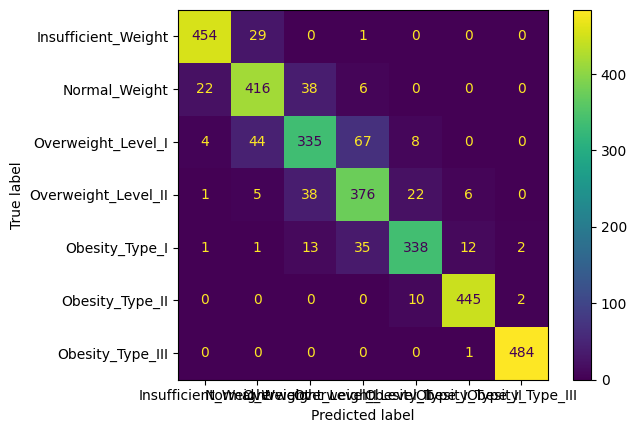

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,RF_predict),display_labels=Obese_level)
display.plot()

## XGBoost

In [ ]:
XGB = xgb.XGBClassifier(objective='multiclass:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
XGB.fit(x_train,y_train,verbose=True,eval_set=[(x_test,y_test)])
XGB_pred = XGB.predict(x_test)
print(classification_report(y_test,XGB_pred,target_names=Obese_level))

[0]	validation_0-aucpr:0.88980
[1]	validation_0-aucpr:0.90703
[2]	validation_0-aucpr:0.91588
[3]	validation_0-aucpr:0.92020
[4]	validation_0-aucpr:0.92341
[5]	validation_0-aucpr:0.92566
[6]	validation_0-aucpr:0.92555
[7]	validation_0-aucpr:0.92882
[8]	validation_0-aucpr:0.93032
[9]	validation_0-aucpr:0.93233
[10]	validation_0-aucpr:0.93353
[11]	validation_0-aucpr:0.93466
[12]	validation_0-aucpr:0.93515
[13]	validation_0-aucpr:0.93617
[14]	validation_0-aucpr:0.93784
[15]	validation_0-aucpr:0.93849
[16]	validation_0-aucpr:0.93983
[17]	validation_0-aucpr:0.94013
[18]	validation_0-aucpr:0.94069
[19]	validation_0-aucpr:0.94089
[20]	validation_0-aucpr:0.94150
[21]	validation_0-aucpr:0.94224
[22]	validation_0-aucpr:0.94275
[23]	validation_0-aucpr:0.94354
[24]	validation_0-aucpr:0.94348
[25]	validation_0-aucpr:0.94386
[26]	validation_0-aucpr:0.94432
[27]	validation_0-aucpr:0.94428
[28]	validation_0-aucpr:0.94417
[29]	validation_0-aucpr:0.94457
[30]	validation_0-aucpr:0.94469
[31]	validation_0-

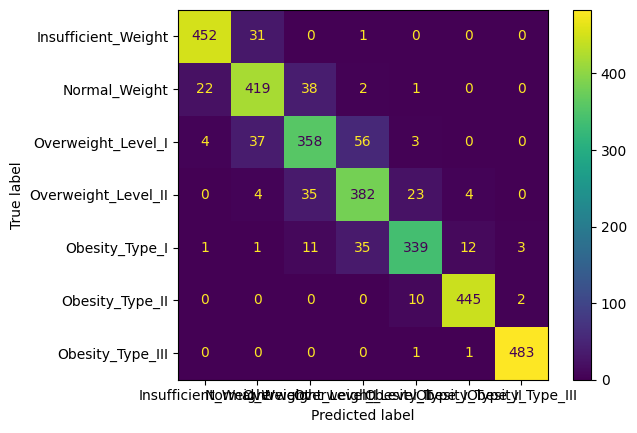

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,XGB_pred),display_labels=Obese_level)
display.plot()

## LightGBM

In [ ]:
LGBM = lgbm.LGBMClassifier(force_row_wise=True)
LGBM.fit(x_train,y_train,eval_set=[(x_test,y_test)])
LGBM_pred = LGBM.predict(x_test)

print(classification_report(y_test,LGBM_pred,target_names=Obese_level))

[LightGBM] [Info] Total Bins 1789
[LightGBM] [Info] Number of data points in the train set: 12860, number of used features: 12
[LightGBM] [Info] Start training from score -1.893498
[LightGBM] [Info] Start training from score -1.897639
[LightGBM] [Info] Start training from score -1.950352
[LightGBM] [Info] Start training from score -1.970789
[LightGBM] [Info] Start training from score -2.079753
[LightGBM] [Info] Start training from score -1.951446
[LightGBM] [Info] Start training from score -1.890918
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.94      0.94       484
      Normal_Weight       0.86      0.86      0.86       482
 Overweight_Level_I       0.81      0.78      0.79       458
Overweight_Level_II       0.81      0.85      0.83       448
     Obesity_Type_I       0.88      0.85      0.86       402
    Obesity_Type_II       0.96      0.96      0.96       457
   Obesity_Type_III       0.99      0.99      0.99       485

     

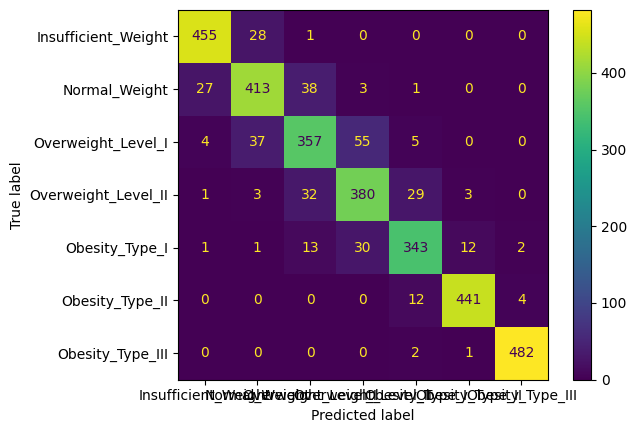

In [ ]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,LGBM_pred),display_labels=Obese_level)
Display.plot()

# Demo

In [ ]:
demo.head(7)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8547,8547,Female,17.469417,1.700000,50.000000,no,yes,2.872121,4.000000,Sometimes,no,2.651258,no,2.000000,1.00000,no,Public_Transportation,Insufficient_Weight
4943,4943,Male,17.000000,1.700000,56.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.00000,Sometimes,Public_Transportation,Normal_Weight
6008,6008,Female,21.000000,1.570000,61.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.00000,Sometimes,Public_Transportation,Overweight_Level_I
8907,8907,Male,27.000000,1.855353,87.002736,yes,yes,2.954417,1.291900,Sometimes,no,2.000000,no,2.877473,1.00000,Sometimes,Public_Transportation,Overweight_Level_II
7994,7994,Female,23.000000,1.744020,82.130728,yes,yes,2.030256,3.000000,Sometimes,no,1.543021,no,0.877295,0.00000,no,Public_Transportation,Obesity_Type_I
9359,9359,Male,32.259623,1.673491,103.706181,yes,yes,2.658112,1.101404,Sometimes,no,1.345298,no,1.112504,0.00000,no,Public_Transportation,Obesity_Type_II
4253,4253,Female,26.000000,1.641784,111.682693,yes,yes,3.000000,3.000000,Sometimes,no,2.623344,no,0.000000,0.26579,Sometimes,Public_Transportation,Obesity_Type_III


Obesity Factors

In [ ]:
selected_features[:12]

['Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'CAEC',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC']

## Function for predicting obesity level

In [ ]:
def predict_obesity_level(demo_data):
    demo_data = demo_data[selected_features]
    demo_data = demo_data.to_frame().T

    cols_to_convert = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']
    for col in cols_to_convert:
        demo_data[col] = pd.to_numeric(demo_data[col], errors='coerce')
        
    demo_data['family_history_with_overweight'] = encoder.fit_transform(demo_data['family_history_with_overweight'])
    demo_data['FAVC'] = encoder.fit_transform(demo_data['FAVC'])
    demo_data['SCC'] = encoder.fit_transform(demo_data['SCC'])
    demo_data['CALC'] = Oncoder.fit_transform(demo_data['CALC'].to_frame())
    demo_data['CAEC'] = Oncoder.fit_transform(demo_data['CAEC'].to_frame())
    
    copydf = data.copy()
    mean_dict = {}
    for i, mean_value in enumerate(scale.mean_):
       feature_name = copydf.columns[i]
       mean_dict[feature_name] = mean_value

    std_dict = {}
    for i, std_value in enumerate(scale.scale_):
        feature_name = copydf.columns[i]
        std_dict[feature_name] = std_value

    demo_data['Age'] = (demo_data['Age'] - mean_dict[('Age')]) / std_dict[('Age')]
    demo_data['Weight'] = (demo_data['Weight'] - mean_dict[('Weight')]) / std_dict[('Weight')]

    demo_data.drop(columns=['NObeyesdad'],inplace=True)
    
    RF_prediction = RF.predict(demo_data)
    XGB_prediction = XGB.predict(demo_data)
    LGBM_prediction = LGBM.predict(demo_data)
    return Obese_level[int(RF_prediction[0])], Obese_level[int(XGB_prediction[0])], Obese_level[int(LGBM_prediction[0])]   

## Result

In [ ]:
for i in range(7):
    RF_pred, XGB_pred, LGBM_pred = predict_obesity_level(demo.iloc[i])
    print(f"Actual Label: {demo.iloc[i]['NObeyesdad']}")
    print(f"RF Prediction: {RF_pred}")
    print(f"XGB Prediction: {XGB_pred}")
    print(f"LGBM Prediction: {LGBM_pred}")
    print("\n")

Actual Label: Insufficient_Weight
RF Prediction: Insufficient_Weight
XGB Prediction: Insufficient_Weight
LGBM Prediction: Insufficient_Weight


Actual Label: Normal_Weight
RF Prediction: Normal_Weight
XGB Prediction: Normal_Weight
LGBM Prediction: Normal_Weight


Actual Label: Overweight_Level_I
RF Prediction: Overweight_Level_I
XGB Prediction: Overweight_Level_I
LGBM Prediction: Overweight_Level_I


Actual Label: Overweight_Level_II
RF Prediction: Overweight_Level_I
XGB Prediction: Overweight_Level_I
LGBM Prediction: Overweight_Level_I


Actual Label: Obesity_Type_I
RF Prediction: Overweight_Level_II
XGB Prediction: Overweight_Level_II
LGBM Prediction: Overweight_Level_II


Actual Label: Obesity_Type_II
RF Prediction: Obesity_Type_II
XGB Prediction: Obesity_Type_II
LGBM Prediction: Obesity_Type_II


Actual Label: Obesity_Type_III
RF Prediction: Obesity_Type_III
XGB Prediction: Obesity_Type_III
LGBM Prediction: Obesity_Type_III




In [ ]:
predict_obesity_level(demo.iloc[0])

('Insufficient_Weight', 'Insufficient_Weight', 'Insufficient_Weight')